In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import random
import math

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
# 작업 공간 변경
workingDir = r'C:\Users\ddsa2\개인 작업\3. Study\Kaggle\playground-series-s3e7'
os.chdir(workingDir)
os.getcwd()

'C:\\Users\\ddsa2\\개인 작업\\3. Study\\Kaggle\\playground-series-s3e7'

In [13]:
# Check trainset
trainData = pd.read_csv('./train.csv')
Additional_trainData = pd.read_csv('./train__dataset.csv')

trainData = pd.concat([trainData, Additional_trainData], axis = 0)
trainData.drop(columns = ['id'], inplace = True)
trainData.reset_index(drop = True, inplace = True)
trainData

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60232,1,0,0,2,0,0,0,103,2018,4,19,0,0,0,0,115.00,0,1
60233,2,0,0,3,0,0,0,129,2018,8,10,1,0,0,0,88.01,1,0
60234,2,0,0,1,0,0,0,90,2018,7,13,1,0,0,0,105.30,0,1
60235,2,0,0,3,0,0,0,18,2018,11,10,1,1,0,1,123.33,1,0


In [14]:
# Class 별 개수
trainData.booking_status.value_counts()

# 불균형이 심한정도는 아님

0    37791
1    22446
Name: booking_status, dtype: int64

In [15]:
# 결측치 확인
trainData.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [19]:
# 특징 구분성 확인
import scipy.stats as sp

# Normal, Abnormal 구분성 확인
def ANOVA(COMPONET_0, COMPONET_1):
    columns = COMPONET_0.columns
    P_values = np.zeros((len(columns), 2))
    replace_info = {}
    
    for idx, col in enumerate(columns):
        replace_info[idx] = col

        Normal = COMPONET_0[col]
        Abnormal = COMPONET_1[col]

        F, P = sp.f_oneway(Normal, Abnormal)
        P_values[idx, 0] = idx
        P_values[idx, 1] = P

    P_values_df = pd.DataFrame(P_values, columns = ['INDEX', 'P_VALUES'])
    P_values_df.iloc[:, 0].replace(replace_info, inplace = True)
    return P_values_df.sort_values(by = 'P_VALUES', ascending = True)

booking_status_True = trainData.loc[trainData.booking_status.values == 0]
booking_status_False = trainData.loc[trainData.booking_status.values == 1]

P_values = ANOVA(booking_status_True, booking_status_False)

In [20]:
P_values

,INDEX,P_VALUES
8,arrival_year,0.000000e+00
16,no_of_special_requests,0.000000e+00
7,lead_time,0.000000e+00
17,booking_status,0.000000e+00
15,avg_price_per_room,1.362050e-318
12,repeated_guest,7.809328e-215
5,required_car_parking_space,1.134844e-117
0,no_of_adults,6.284450e-103
14,no_of_previous_bookings_not_canceled,7.773519e-74
3,no_of_week_nights,4.445287e-72


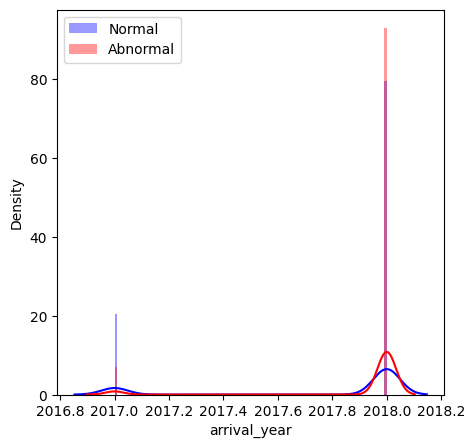

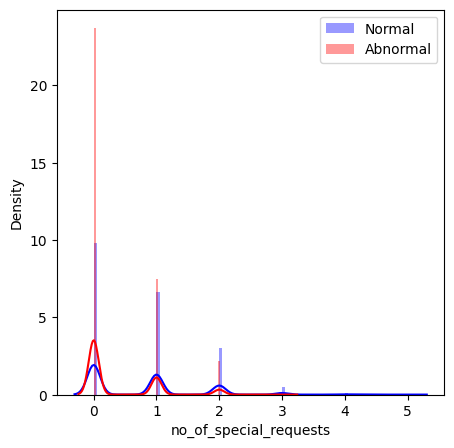

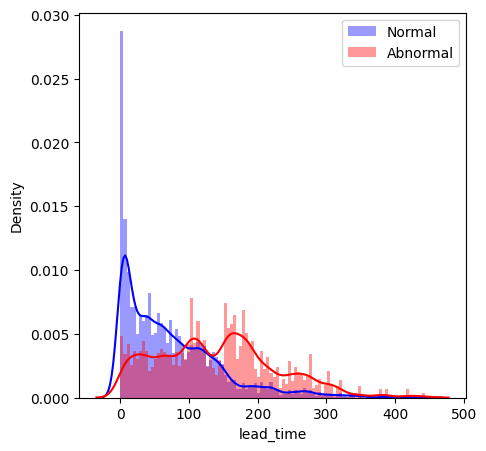

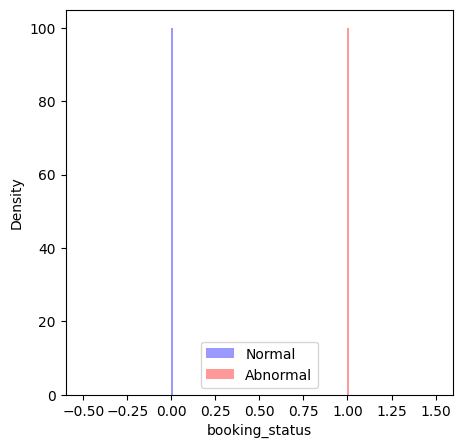

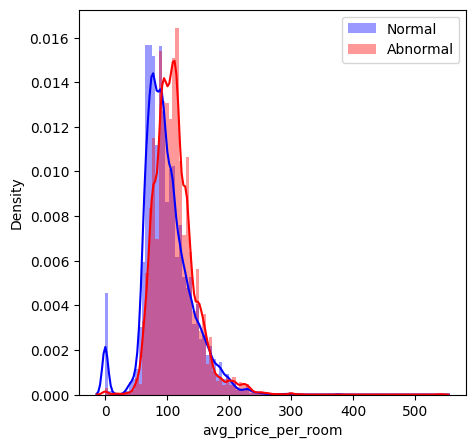

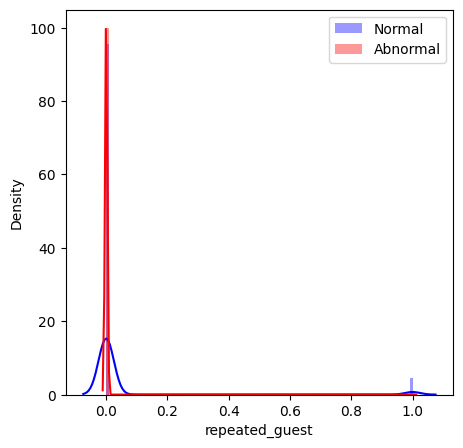

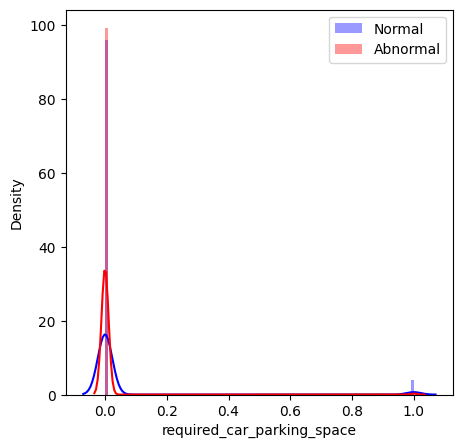

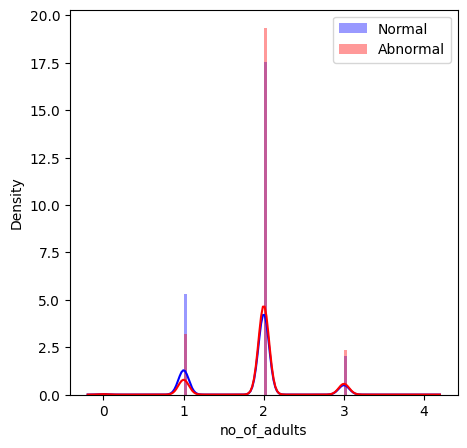

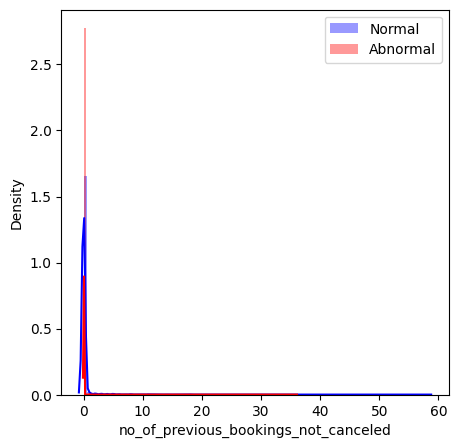

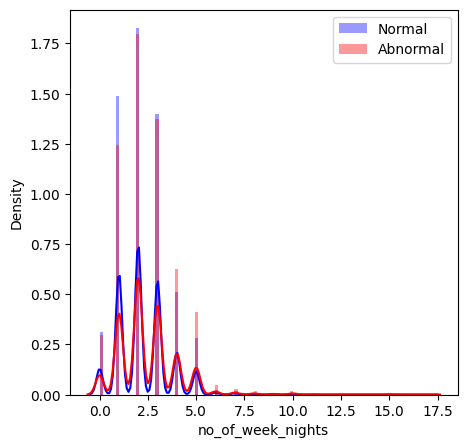

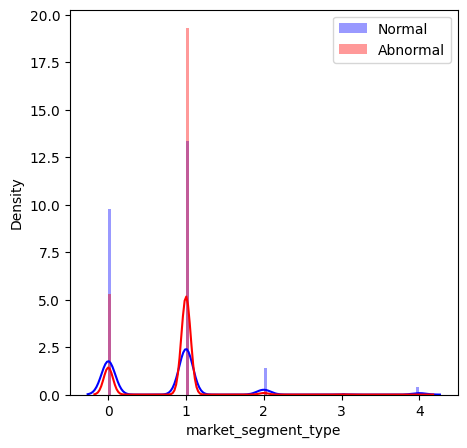

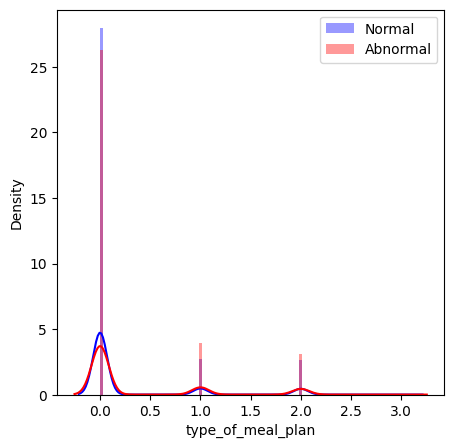

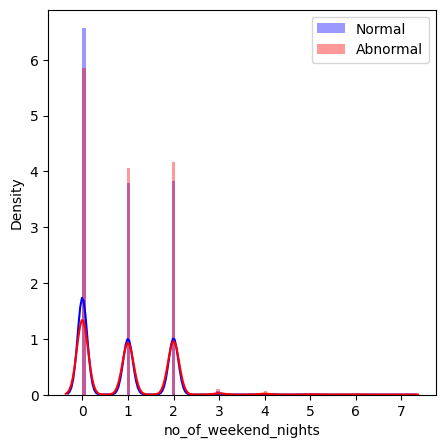

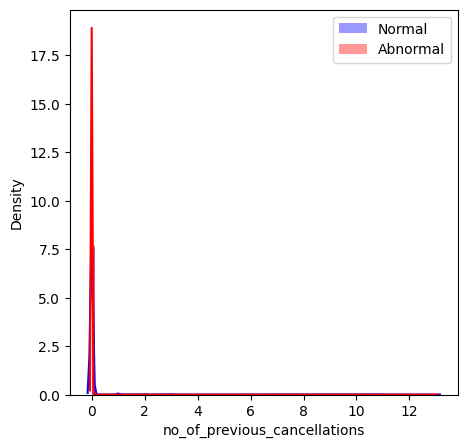

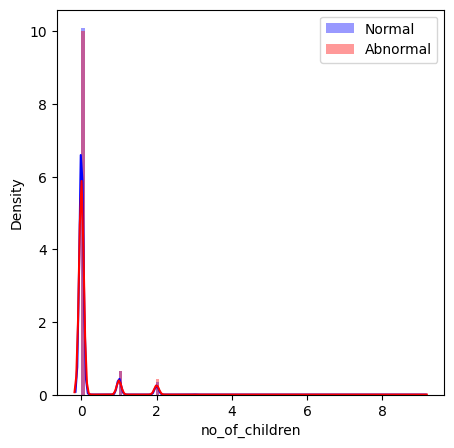

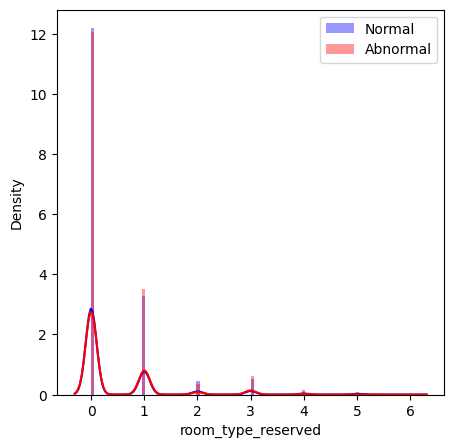

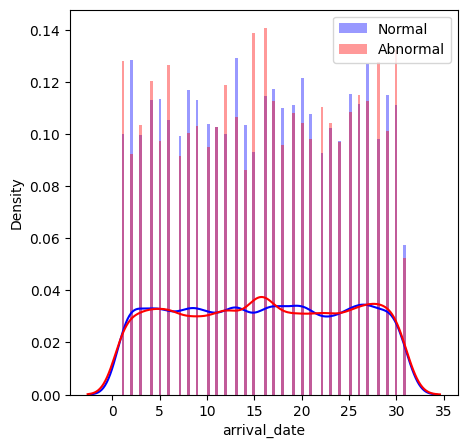

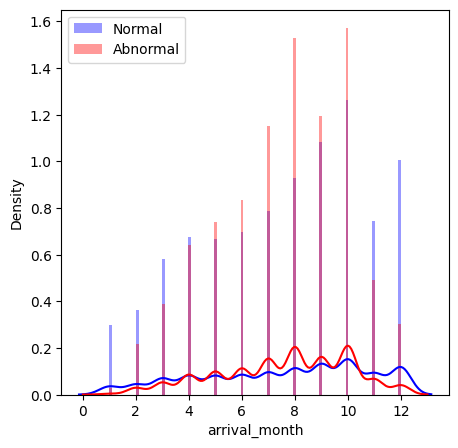

In [25]:
def ANONA_result_plot(COMPONENT1, COMPONENT2, P_values): #Normal, Abnormal
    Columns_name = P_values['INDEX']
    for col in Columns_name:
        plt.figure(figsize = (5,5))
        sns.distplot(COMPONENT1[col], label = 'Normal', color = 'b', bins = 100)
        sns.distplot(COMPONENT2[col], label = 'Abnormal', color = 'r', bins = 100)
        plt.legend()
        plt.show()

ANONA_result_plot(booking_status_True, booking_status_False, P_values)
# 신뢰성 떨어짐

In [10]:
booking_status_0 = trainData.loc[trainData.booking_status.values == 0]
booking_status_1 = trainData.loc[trainData.booking_status.values == 1]

statistics_0 = booking_status_0.describe()
statistics_1 = booking_status_1.describe()

statistics_1 - statistics_0

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.000000,-9092.0
mean,0.085763,0.003927,0.080330,0.171049,0.055348,-0.029969,-0.039374,62.248416,0.128134,0.044272,0.056885,0.146179,-0.046919,-0.030434,-0.284424,11.980234,-0.349697,1.0
std,-0.058612,0.002042,0.014517,0.121983,0.026095,-0.105216,-0.095537,10.523134,-0.147444,-0.688165,0.031504,-0.306781,-0.187083,-0.303839,-1.918550,-5.995779,-0.231603,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.600000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.010000,0.000000,1.0
max,0.000000,-5.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-22.000000,0.000000,-2.000000,1.0


In [22]:
from sklearn.model_selection import train_test_split

train_idx, valid_idx = train_test_split(range(trainData.shape[0]), test_size = 0.2, stratify = trainData.booking_status, random_state = 777, shuffle = True)

X_train = trainData.iloc[train_idx, :]
X_valid = trainData.iloc[valid_idx, :]

get_mean = X_train.iloc[:, :-1].mean()
get_std = X_train.iloc[:, :-1].std()

X_train_normalized = (X_train.iloc[:, :-1] - get_mean) / get_std
X_valid_normalized = (X_valid.iloc[:, :-1] - get_mean) / get_std

X_train_normalized = pd.concat([X_train_normalized, X_train.booking_status], axis = 1)
X_valid_normalized = pd.concat([X_valid_normalized, X_valid.booking_status], axis = 1)

X_train_normalized

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6716,0.193179,-0.296959,-0.976573,1.151574,-0.436633,-0.167229,0.737938,0.958636,0.426509,0.846995,-1.114314,0.387964,-0.169251,-0.060663,-0.097361,0.497103,-0.750320,1
10843,0.193179,-0.296959,0.154108,0.456510,-0.436633,-0.167229,-0.492444,2.063984,0.426509,-1.218183,0.466129,-1.180721,-0.169251,-0.060663,-0.097361,-1.129695,-0.750320,1
966,0.193179,-0.296959,-0.976573,0.456510,-0.436633,-0.167229,-0.492444,-0.543195,0.426509,1.191191,-0.211204,-1.180721,-0.169251,-0.060663,-0.097361,-0.987760,-0.750320,0
1660,0.193179,-0.296959,-0.976573,-0.933617,-0.436633,-0.167229,-0.492444,-1.035796,-2.344565,1.191191,0.014573,5.094019,5.908267,-0.060663,1.041269,-2.843838,0.532349,0
48580,0.193179,-0.296959,-0.976573,-0.238554,-0.436633,-0.167229,-0.492444,-1.095869,0.426509,1.535387,-0.775648,0.387964,-0.169251,-0.060663,-0.097361,0.540775,0.532349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38627,0.193179,-0.296959,0.154108,0.456510,-0.436633,-0.167229,-0.492444,-0.158727,0.426509,0.846995,0.691906,-1.180721,-0.169251,-0.060663,-0.097361,-0.523740,0.532349,0
14659,0.193179,-0.296959,-0.976573,0.456510,-0.436633,-0.167229,-0.492444,1.475266,0.426509,0.502798,1.482128,0.387964,-0.169251,-0.060663,-0.097361,0.308765,1.815018,1
47580,-1.715986,-0.296959,3.546152,3.931829,-0.436633,-0.167229,-0.492444,-0.735430,0.426509,-1.906575,0.466129,0.387964,-0.169251,-0.060663,-0.097361,-2.830190,-0.750320,0
1286,0.193179,1.993767,0.154108,0.456510,-0.436633,-0.167229,-0.492444,0.970650,0.426509,0.846995,1.595017,0.387964,-0.169251,-0.060663,-0.097361,0.226879,1.815018,1


In [23]:
# 고차원 데이터 분포 확인, 아마 거의 구분 안될 것으로 보임
from sklearn.manifold import TSNE

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(X_train_normalized.iloc[:,:-1])

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

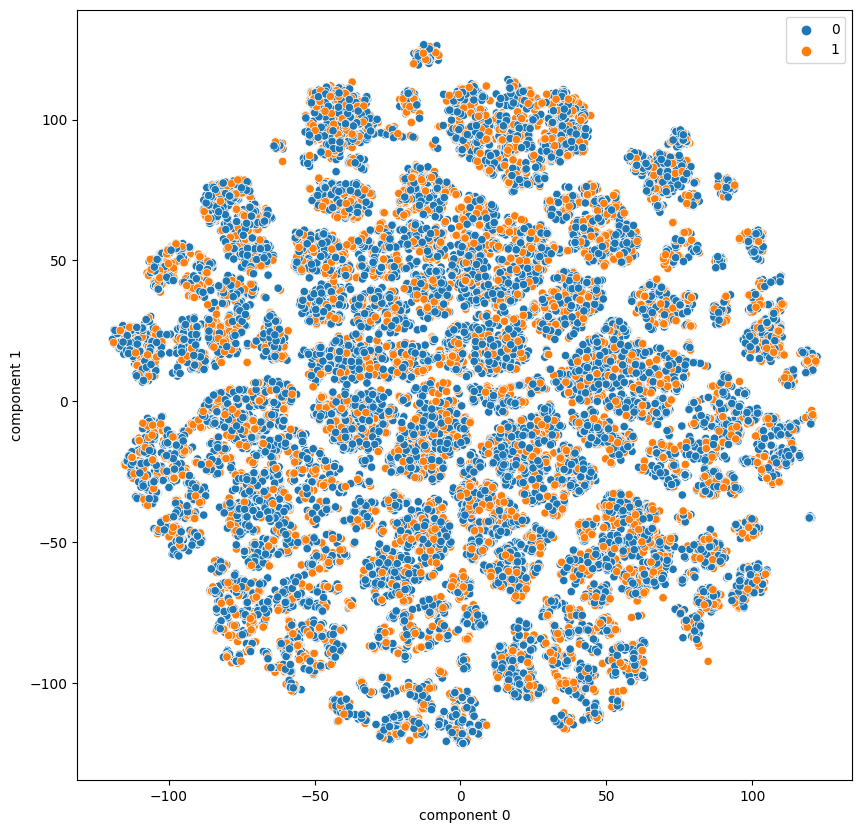

In [24]:
# class target 정보 불러오기 
tsne_df['booking_status'] = trainData['booking_status']
plt.figure(figsize = (10,10))
sns.scatterplot(data = tsne_df, x = 'component 0', y = 'component 1', hue = 'booking_status')
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()